# Module 2: Naive Bayes example

In this notebook we will implement a Naive Bayes classifier to distinguish between the different classes existent in two different datasets: the [Mushroom data set](https://archive.ics.uci.edu/ml/datasets/Mushroom) and the <a href="https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html">Iris flower data set</a>.

We will start with a binary dataset (i.e. the Mushroom data set) and then move to a multi-class data set and learn how scikit-learn is able to automatically deal with multi-class for us.

The Mushroom dataset contains data on which mushrooms are edible and which are poisonous. There are 8124 mushrooms defined in the dataset of which 4208 are edible and 3915 are poisonous. Each of these is characterized by 22 features.

On the other hand, the Iris flower dataset consists of 3 different types of irises' (Setosa, Versicolor, and Virginica) petal and sepal length, stored in a 150x4 numpy ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

First of all, let's see the libraries we will use during our practical assignment:

### [numpy](https://numpy.org)

The NumPy library for Python concentrates on handling extensive multi-dimensional data and the intricate mathematical functions operating on the data. NumPy offers speedy computation and execution of complicated functions working on arrays. Few of the points in favor of NumPy are:

- Support for mathematical and logical operations
- Shape manipulation
- Sorting and Selecting capabilities
- Discrete Fourier transformations
- Basic linear algebra and statistical operations
- Random simulations
- Support for n-dimensional arrays

NumPy works on an object-oriented approach and has tools for integrating C, C++ and Fortran code, and this makes NumPy highly popular amongst the scientific community.

### [pandas](https://pandas.pydata.org)

Pandas is a Python data analysis library and is used primarily for data manipulation and analysis. It comes into play before the dataset is prepared for training. Pandas make working with time series and structured multidimensional data effortless for machine-learning programmers. Some of the great features of Pandas when it comes to handling data are:

- Dataset reshaping and pivoting
- Merging and joining of datasets
- Handling of missing data and data alignment
- Various indexing options such as Hierarchical axis indexing, Fancy indexing
- Data filtration options

Pandas makes use of DataFrames, which is just a technical term for a two-dimensional representation of data by offering programmers with DataFrame objects.

### [scikit-learn](https://scikit-learn.org)

Scikit-learn is a very actively used machine learning library for Python. It includes easy integration with different ML programming libraries like NumPy and Pandas. Scikit-learn comes with the support of various algorithms such as:

- Classification
- Regression
- Clustering
- Dimensionality Reduction
- Model Selection
- Preprocessing

Built around the idea of being easy to use but still be flexible, Scikit-learn is focussed on data modelling and not on other tasks such as loading, handling, manipulation and visualization of data. It is considered sufficient enough to be used as an end-to-end ML, from the research phase to the deployment.

### [matplotlib](https://matplotlib.org)

Simply put, matplotlib is a plotting library. If you’ve ever used MATLAB before, you’ll probably feel very comfortable in the matplotlib environment. When analyzing images, we’ll make use of matplotlib, whether plotting the overall accuracy of search systems or simply viewing the image itself, matplotlib is a great tool to have in your toolbox.

Matplotlib is a comprehensive data visualization library in Python. Some features include:

- creating interactive plots.
- offering flexible customization of the plot.

It is a foundation library supporting seaborn, which is easier to use. But when we want to customize the plots more, matplotlib becomes necessary. It's also useful for quick tests and visualizations.

### [seaborn](https://seaborn.pydata.org)

Seaborn is a popular Python library for making statistical data visualizations. It is based on matplotlib and also integrated with pandas data structures.

Seaborn is especially useful for exploring and understanding data. Some of the functionalities that seaborn offers:

- options for visualizing univariate and bivariate distributions.
- options for visualizing numerical and categorical variables.
- automatic estimation and plotting of linear regression models.
- ability to build complex visualizations such as multi-plot grids.

It comes in handy whenever whe need to explore a dataset with Histograms, Heatmaps, Scatter plots, Barplots, etc.


This is a general introduction of each of the libraries we will use. For more information, feel free to refer to their official webpages.


### Mushrooms data set

Now, as we said, we will start with the Mushroom dataset. To do so, we will first import everything we need:

In [ ]:
# Import packages
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

After loading the libraries, we need to load the data.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
!cat agaricus-lepiota.data | head 

--2021-01-07 16:35:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data’

agaricus-lepiota.da 100%[===================>] 364.95K  1.37MB/s    in 0.3s    

2021-01-07 16:35:37 (1.37 MB/s) - ‘agaricus-lepiota.data’ saved [373704/373704]

p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
e,b,s,y,t,a,f,c,b,g

The first column shows the class: "p" for poisonous, "e" for edible. The rest of columns are the features. Let's load the data:

In [ ]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


All the variables are categorical, so we need to convert them to numerical.

In [ ]:
# All the variables are in string format. Convert categorical variables to integer using label encoder
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col]=lbl.fit_transform(mushrooms[col])

In [ ]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1


Now that we have the dataset all with numerical values, we can separate the data and the labels and split in training and testing set.

As you all already know, in order to carry out experiments, we need to split the dataset in two subsets, one for training and another one for testing. We'll do it using scikit-learn `train_test_split` function, as we learnt in the first unit.

In [ ]:
x = mushrooms.values[:, 1:]
y = mushrooms.values[:, 0]

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

Let's check the shape of each subset:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (5442, 22)
ytrain shape:  (5442,)
xtest shape:  (2681, 22)
ytest shape:  (2681,)


At this point we have everything we need to start implementing our classifier. In this example we will use the Naive Bayes rule to classify the different samples in our dataset.

`scikit-learn` implements such a classifier in its `GaussianNB` class. It only has two parameters:

```
priors: array-like of shape (n_classes,)
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

var_smoothing: float, default=1e-9
Portion of the largest variance of all features that is added to variances for calculation stability.
```

For our task, we'll leave them by default.

Let's create the classifier:

In [ ]:
# Init the Gaussian Classifier
model = GaussianNB()

Now, we can use the `train` method to fit the classifier to our train set:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

And once it's trained, use the model to predict the samples in the test set:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives.

Text(89.18, 0.5, 'Predicted')

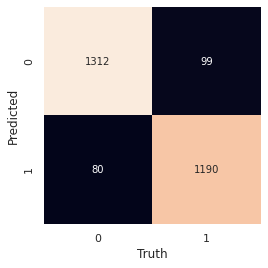

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

We can also compute the most common classification metrics with the help of `sklearn.metrics.classification_report`. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical documents of the course or access the <a hred="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">documentation</a>.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1392
           1       0.94      0.92      0.93      1289

    accuracy                           0.93      2681
   macro avg       0.93      0.93      0.93      2681
weighted avg       0.93      0.93      0.93      2681



Furthermore, thanks to the probabilistic behaviour of the Naive Bayes classifier, we can easily access the probability of each instance belonging to each lass:

In [ ]:
preds_proba = model.predict_proba(xtest)
print(preds_proba[:10, :])

[[5.05117438e-02 9.49488256e-01]
 [1.00000000e+00 4.15747645e-10]
 [5.46051247e-01 4.53948753e-01]
 [4.04075684e-09 9.99999996e-01]
 [1.22953379e-01 8.77046621e-01]
 [3.95865661e-09 9.99999996e-01]
 [1.77368881e-08 9.99999982e-01]
 [7.87857878e-01 2.12142122e-01]
 [4.70962743e-02 9.52903726e-01]
 [4.55049676e-01 5.44950324e-01]]


These probabilities show the probability of each instance to belong to each of the two classes: edible and poisonous.

### Iris flower dataset

For the Iris flower dataset, we'll use scikit-learn's `datasets` class, which gives easy access to common toy datasets used in Machine Learning/Deep Learning.

In this example, we will deal with a multiclass problem automatically thanks to the internal mechanisms of `scikit-learn`, that will deal with it for us. From now on, we will carry out all the examples with the Iris flower dataset.

The data itself is contained in `iris.data`, and the labels are in `iris.target`.

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

As you all already know, in order to carry out experiments, we need to split the dataset in two subsets, one for training and another one for testing. We'll do it using scikit-learn `train_test_split` function, as we learnt in the first unit.

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

Let's check the shape of each subset:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100, 4)
xtest shape:  (50, 4)
ytest shape:  (50, 4)


At this point we have everything we need to start implementing our classifier. In this example we will use the Naive Bayes rule to classify the different samples in our dataset.

`scikit-learn` implements such a classifier in its `GaussianNB` class. It only has two parameters:

```
priors: array-like of shape (n_classes,)
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

var_smoothing: float, default=1e-9
Portion of the largest variance of all features that is added to variances for calculation stability.
```

For our task, we'll leave them by default.

Let's create the classifier:

In [ ]:
# Init the Gaussian Classifier
model = GaussianNB()

Now, we can use the `train` method to fit the classifier to our train set:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

And once it's trained, use the model to predict the samples in the test set:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives.

Text(89.18, 0.5, 'Predicted')

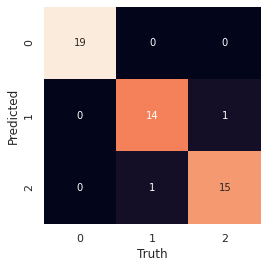

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

As you can see, the model behaves almost perfectly, with only 2 miss-classifications.

We can also compute the most common classification metrics with the help of `sklearn.metrics.classification_report`. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical documents of the course or access the <a hred="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">documentation</a>.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Furthermore, thanks to the probabilistic behaviour of the Naive Bayes classifier, we can easily access the probability of each instance belonging to each lass:

In [ ]:
preds_proba = model.predict_proba(xtest)
print(preds_proba[:10, :])

[[4.37674065e-088 9.96967740e-001 3.03225987e-003]
 [1.00000000e+000 1.10075926e-013 5.75548232e-021]
 [8.81811890e-285 2.91560680e-012 1.00000000e+000]
 [9.76309671e-092 9.77779145e-001 2.22208554e-002]
 [1.19289056e-103 8.59834631e-001 1.40165369e-001]
 [1.00000000e+000 6.25385602e-013 3.18762182e-021]
 [2.93829356e-051 9.99965857e-001 3.41429329e-005]
 [3.80802438e-172 4.36088518e-007 9.99999564e-001]
 [9.28005614e-094 9.94415433e-001 5.58456693e-003]
 [1.09359734e-057 9.99961685e-001 3.83153607e-005]]


These probabilities show the probability of each instance to belong to each of the three classes: setosa, versicolor and virginica.

Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

(3.3, 8.880000000000006, 1.0, 5.380000000000004)

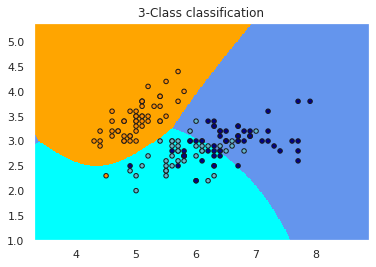

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, :2] # to visualize in 2-dim, we can only take 2 variables
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, :2], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')

Another possible option would be to apply a PCA to the Iris data to reduce the number of dimensions to just 2 and then use the transformed data to visualise the decision boundaries. You are welcome to try it!